In [1]:
# Turn on multi-threading on your computer for faster calculation 
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [2]:
#IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
#IMPORT THE DATASETS (dropping the ID columns)
path = "credit data.xlsx"
creditData = pd.read_excel(path, sheet_name = "credit data", index_col = 0, header = 0)
creditData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 1 to 24000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  24000 non-null  int64
 1   SEX        24000 non-null  int64
 2   EDUCATION  24000 non-null  int64
 3   MARRIAGE   24000 non-null  int64
 4   AGE        24000 non-null  int64
 5   PAY_1      24000 non-null  int64
 6   PAY_2      24000 non-null  int64
 7   PAY_3      24000 non-null  int64
 8   PAY_4      24000 non-null  int64
 9   PAY_5      24000 non-null  int64
 10  PAY_6      24000 non-null  int64
 11  BILL_AMT1  24000 non-null  int64
 12  BILL_AMT2  24000 non-null  int64
 13  BILL_AMT3  24000 non-null  int64
 14  BILL_AMT4  24000 non-null  int64
 15  BILL_AMT5  24000 non-null  int64
 16  BILL_AMT6  24000 non-null  int64
 17  PAY_AMT1   24000 non-null  int64
 18  PAY_AMT2   24000 non-null  int64
 19  PAY_AMT3   24000 non-null  int64
 20  PAY_AMT4   24000 non-null  int64
 21  PAY_AMT5   2

In [4]:
#IMPORT THE DATASETS (dropping the ID columns)
path2 = "new applications.xlsx"
newAppl = pd.read_excel(path2, sheet_name = "new applications", index_col = 0, header = 0)
newAppl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, n1000-1 to n1000-1000
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  1000 non-null   int64
 1   SEX        1000 non-null   int64
 2   EDUCATION  1000 non-null   int64
 3   MARRIAGE   1000 non-null   int64
 4   AGE        1000 non-null   int64
 5   PAY_1      1000 non-null   int64
 6   PAY_2      1000 non-null   int64
 7   PAY_3      1000 non-null   int64
 8   PAY_4      1000 non-null   int64
 9   PAY_5      1000 non-null   int64
 10  PAY_6      1000 non-null   int64
 11  BILL_AMT1  1000 non-null   int64
 12  BILL_AMT2  1000 non-null   int64
 13  BILL_AMT3  1000 non-null   int64
 14  BILL_AMT4  1000 non-null   int64
 15  BILL_AMT5  1000 non-null   int64
 16  BILL_AMT6  1000 non-null   int64
 17  PAY_AMT1   1000 non-null   int64
 18  PAY_AMT2   1000 non-null   int64
 19  PAY_AMT3   1000 non-null   int64
 20  PAY_AMT4   1000 non-null   int64
 21  PAY_AMT

In [5]:
#CHANGE TO CATEGORICAL FEATURES
creditData['SEX'] = creditData['SEX'].astype('category')
creditData['EDUCATION'] = creditData['EDUCATION'].astype('category')
creditData['MARRIAGE'] = creditData['MARRIAGE'].astype('category')
creditData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 1 to 24000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  24000 non-null  int64   
 1   SEX        24000 non-null  category
 2   EDUCATION  24000 non-null  category
 3   MARRIAGE   24000 non-null  category
 4   AGE        24000 non-null  int64   
 5   PAY_1      24000 non-null  int64   
 6   PAY_2      24000 non-null  int64   
 7   PAY_3      24000 non-null  int64   
 8   PAY_4      24000 non-null  int64   
 9   PAY_5      24000 non-null  int64   
 10  PAY_6      24000 non-null  int64   
 11  BILL_AMT1  24000 non-null  int64   
 12  BILL_AMT2  24000 non-null  int64   
 13  BILL_AMT3  24000 non-null  int64   
 14  BILL_AMT4  24000 non-null  int64   
 15  BILL_AMT5  24000 non-null  int64   
 16  BILL_AMT6  24000 non-null  int64   
 17  PAY_AMT1   24000 non-null  int64   
 18  PAY_AMT2   24000 non-null  int64   
 19  PAY_AMT3   24000 non-null

In [6]:
#CHANGE TO CATEGORICAL FEATURES
newAppl['SEX'] = newAppl['SEX'].astype('category')
newAppl['EDUCATION'] = newAppl['EDUCATION'].astype('category')
newAppl['MARRIAGE'] = newAppl['MARRIAGE'].astype('category')
newAppl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, n1000-1 to n1000-1000
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  1000 non-null   int64   
 1   SEX        1000 non-null   category
 2   EDUCATION  1000 non-null   category
 3   MARRIAGE   1000 non-null   category
 4   AGE        1000 non-null   int64   
 5   PAY_1      1000 non-null   int64   
 6   PAY_2      1000 non-null   int64   
 7   PAY_3      1000 non-null   int64   
 8   PAY_4      1000 non-null   int64   
 9   PAY_5      1000 non-null   int64   
 10  PAY_6      1000 non-null   int64   
 11  BILL_AMT1  1000 non-null   int64   
 12  BILL_AMT2  1000 non-null   int64   
 13  BILL_AMT3  1000 non-null   int64   
 14  BILL_AMT4  1000 non-null   int64   
 15  BILL_AMT5  1000 non-null   int64   
 16  BILL_AMT6  1000 non-null   int64   
 17  PAY_AMT1   1000 non-null   int64   
 18  PAY_AMT2   1000 non-null   int64   
 19  PAY_AMT3   1000 non-

In [7]:
#CHECK FOR RARE OR RANDOM CATEGORIES
for col in creditData.select_dtypes(include=['category','object','bool']).columns:
    print(col)
    print(creditData[col].value_counts())
    print('\n')

SEX
2    14422
1     9578
Name: SEX, dtype: int64


EDUCATION
2    11213
1     8486
3     3944
5      217
4       90
6       39
0       11
Name: EDUCATION, dtype: int64


MARRIAGE
2    12808
1    10897
3      253
0       42
Name: MARRIAGE, dtype: int64




In [8]:
#CHECK FOR RARE OR RANDOM CATEGORIES
for col in newAppl.select_dtypes(include=['category','object','bool']).columns:
    print(col)
    print(newAppl[col].value_counts())
    print('\n')

SEX
2    633
1    367
Name: SEX, dtype: int64


EDUCATION
2    480
1    341
3    161
5     10
4      5
6      2
0      1
Name: EDUCATION, dtype: int64


MARRIAGE
2    503
1    479
3     15
0      3
Name: MARRIAGE, dtype: int64




In [9]:
#COMBINE RARE CATEGORIES
creditData["EDUCATION"] = creditData["EDUCATION"].replace(0, 4)
creditData["EDUCATION"] = creditData["EDUCATION"].replace(5, 4)
creditData["EDUCATION"] = creditData["EDUCATION"].replace(6, 4)
creditData["MARRIAGE"] = creditData["MARRIAGE"].replace(0, 3)

newAppl["EDUCATION"] = newAppl["EDUCATION"].replace(0, 4)
newAppl["EDUCATION"] = newAppl["EDUCATION"].replace(5, 4)
newAppl["EDUCATION"] = newAppl["EDUCATION"].replace(6, 4)
newAppl["MARRIAGE"] = newAppl["MARRIAGE"].replace(0, 3)

In [10]:
#CATEGORY NAMING
creditData["SEX"] = creditData["SEX"].cat.rename_categories(["male", "female"])
creditData["EDUCATION"] = creditData["EDUCATION"].cat.set_categories([4,1,2,3])
creditData["EDUCATION"] = creditData["EDUCATION"].cat.rename_categories(["other", "graduate", "undergraduate", "high-school"])
creditData["MARRIAGE"] = creditData["MARRIAGE"].cat.set_categories([3,1,2])
creditData["MARRIAGE"] = creditData["MARRIAGE"].cat.rename_categories(["other", "married", "single"])

newAppl["SEX"] = newAppl["SEX"].cat.rename_categories(["male", "female"])
newAppl["EDUCATION"] = newAppl["EDUCATION"].cat.set_categories([4,1,2,3])
newAppl["EDUCATION"] = newAppl["EDUCATION"].cat.rename_categories(["other", "graduate", "undergraduate", "high-school"])
newAppl["MARRIAGE"] = newAppl["MARRIAGE"].cat.set_categories([3,1,2])
newAppl["MARRIAGE"] = newAppl["MARRIAGE"].cat.rename_categories(["other", "married", "single"])

In [11]:
for col in creditData.select_dtypes(include=['category','object','bool']).columns:
    print(col)
    print(creditData[col].value_counts())
    print('\n')

SEX
female    14422
male       9578
Name: SEX, dtype: int64


EDUCATION
undergraduate    11213
graduate          8486
high-school       3944
other              357
Name: EDUCATION, dtype: int64


MARRIAGE
single     12808
married    10897
other        295
Name: MARRIAGE, dtype: int64




In [12]:
for col in newAppl.select_dtypes(include=['category','object','bool']).columns:
    print(col)
    print(newAppl[col].value_counts())
    print('\n')

SEX
female    633
male      367
Name: SEX, dtype: int64


EDUCATION
undergraduate    480
graduate         341
high-school      161
other             18
Name: EDUCATION, dtype: int64


MARRIAGE
single     503
married    479
other       18
Name: MARRIAGE, dtype: int64




In [13]:
# "CLEANING" THE DATA -- WRAPPING UP: CREATING DUMMY VARIABLES FOR NON-NUMBERS ("ONE HOT ENCODING")
creditData = pd.get_dummies(creditData, columns = creditData.select_dtypes (exclude=['int64','float64']).columns, drop_first = True)
pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows
creditData.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0,SEX_female,EDUCATION_graduate,EDUCATION_undergraduate,EDUCATION_high-school,MARRIAGE_married,MARRIAGE_single
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,1,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,1,0,1,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,1,0
5,50000,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,1,0,0,0,1


In [14]:
# "CLEANING" THE DATA -- WRAPPING UP: CREATING DUMMY VARIABLES FOR NON-NUMBERS ("ONE HOT ENCODING")
newAppl = pd.get_dummies(newAppl, columns = newAppl.select_dtypes (exclude=['int64','float64']).columns, drop_first = True)
pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows
newAppl.head()


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,EDUCATION_graduate,EDUCATION_undergraduate,EDUCATION_high-school,MARRIAGE_married,MARRIAGE_single
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
n1000-1,500000,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,1,0,0,0,1
n1000-2,210000,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
n1000-3,150000,27,0,0,0,0,0,0,86009,86108,89006,89775,87725,40788,4031,10006,3266,4040,1698,800,0,1,0,0,0,1
n1000-4,20000,38,0,0,0,0,0,-1,17973,19367,19559,18240,17928,150,1699,1460,626,1750,150,0,0,0,1,0,1,0
n1000-5,400000,34,-1,-1,-1,-1,-1,-1,19660,9666,11867,7839,14837,7959,9677,11867,7839,14837,7959,5712,0,0,1,0,1,0


In [15]:
#ADD PAYMENT STATUS COUNTS
temp_data = creditData[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
temp_data["default_1"], temp_data["on_time"], temp_data["full_payment"], temp_data["no_pay_needed"] = [0,0,0,0]

temp_data_p = newAppl[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
temp_data_p["default_1"], temp_data_p["on_time"], temp_data_p["full_payment"], temp_data_p["no_pay_needed"] = [0,0,0,0]

for i in range(1, 7):
    for j in range(1, 24001):
        if temp_data["PAY_"+str(i)][j] > 0:
            temp_data["default_1"][j] += 1;
        elif temp_data["PAY_"+str(i)][j] == 0:
            temp_data["on_time"][j] += 1;
        elif temp_data["PAY_"+str(i)][j] == -1:
            temp_data["full_payment"][j] += 1;
        else:
            temp_data["no_pay_needed"][j] += 1;

for i in range(1, 7):
    for j in range(0, 1000):
        if temp_data_p["PAY_"+str(i)][j] > 0:
            temp_data_p["default_1"][j] += 1;
        elif temp_data_p["PAY_"+str(i)][j] == 0:
            temp_data_p["on_time"][j] += 1;
        elif temp_data_p["PAY_"+str(i)][j] == -1:
            temp_data_p["full_payment"][j] += 1;
        else:
            temp_data_p["no_pay_needed"][j] += 1;

In [16]:
creditData[["default_1", "on_time", "full_payment", "no_pay_needed"]] = temp_data[["default_1", "on_time", "full_payment", "no_pay_needed"]]
creditData.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0,SEX_female,EDUCATION_graduate,EDUCATION_undergraduate,EDUCATION_high-school,MARRIAGE_married,MARRIAGE_single,default_1,on_time,full_payment,no_pay_needed
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,1,0,1,0,2,0,2,2
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,1,0,0,1,0,6,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,1,0,1,0,0,6,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,1,0,0,4,2,0
5,50000,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,1,0,0,0,1,0,6,0,0


In [17]:
newAppl[["default_1", "on_time", "full_payment", "no_pay_needed"]] = temp_data_p[["default_1", "on_time", "full_payment", "no_pay_needed"]]
newAppl.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,EDUCATION_graduate,EDUCATION_undergraduate,EDUCATION_high-school,MARRIAGE_married,MARRIAGE_single,default_1,on_time,full_payment,no_pay_needed
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n1000-1,500000,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,1,0,0,0,1,0,6,0,0
n1000-2,210000,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,6
n1000-3,150000,27,0,0,0,0,0,0,86009,86108,89006,89775,87725,40788,4031,10006,3266,4040,1698,800,0,1,0,0,0,1,0,6,0,0
n1000-4,20000,38,0,0,0,0,0,-1,17973,19367,19559,18240,17928,150,1699,1460,626,1750,150,0,0,0,1,0,1,0,0,5,1,0
n1000-5,400000,34,-1,-1,-1,-1,-1,-1,19660,9666,11867,7839,14837,7959,9677,11867,7839,14837,7959,5712,0,0,1,0,1,0,0,0,6,0


In [19]:
#ADD CREDIT UTILITY FEATURE
for i in range(1,7):
    creditData["credit_utility"+str(i)] = creditData["BILL_AMT"+str(i)]/creditData["LIMIT_BAL"]
    
for i in range(1,7):
    newAppl["credit_utility"+str(i)] = newAppl["BILL_AMT"+str(i)]/newAppl["LIMIT_BAL"]

In [20]:
#SETTING X & Y VARIABLES
Y = creditData["default_0"]
X = creditData.drop(columns="default_0")

In [21]:
# SETTING RANDOM SEED
seed = 69122
np.random.seed(seed)

In [22]:
# SPLIT THE DATA RANDOMLY INTO 80% TRAIN AND 20% TEST DATASET 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, stratify=Y)

In [23]:
# ROC CURVE
def plot_roc(Y_test, Y_pred):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [24]:
# CONFUSION MATRIX RETURNS IN THE FORMAT: CM[0,0], CM[0,1], CM[1,0], CM[1,1]: TN, FP, FN, TP
# SENSITIVITY
def custom_sensitivity_score(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))
# SPECIFICITY
def custom_specificity_score(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))
# POSITIVE PREDICTIVE VALUE
def custom_ppv_score(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))
# NEGATIVE PREDICTIVE VALUE
def custom_npv_score(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))
# ACCURACY
def custom_accuracy_score(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

# LOGISTIC REGRESSION

In [25]:
# DEFINE THE MODEL AND CALL IT CLASSIFIER_LR
classifier_LR = LogisticRegression()

In [26]:
# TRAIN CLASSIFIER_LR ON THE TRAINING DATA
classifier_LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#IDENTIFY THE 5 LARGEST POSITIVE AND 5 LARGEST NEGATIVE COEFFICIENT VARAIBLES
print('Intercept: ' + str(classifier_LR.intercept_))
print('Coefficients (5 largest and 5 smallest) [recall, there are 37 of them, in total: ')
summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
top5positive = summary.head(5) # 5 largest (by value)
top5negative = summary.tail(5) # 5 smallest (by value)
top5list=pd.DataFrame()
top5list= top5list.append(pd.DataFrame(data = top5positive))
top5list= top5list.append(pd.DataFrame(data = top5negative))
top5list

Intercept: [-3.21562769e-05]
Coefficients (5 largest and 5 smallest) [recall, there are 37 of them, in total: 


,Variable,Coefficient
26,default_1,0.000106537
2,PAY_1,7.19583e-05
3,PAY_2,5.59729e-05
4,PAY_3,4.96811e-05
5,PAY_4,4.68558e-05
25,MARRIAGE_single,-2.47827e-05
15,PAY_AMT2,-2.79603e-05
28,full_payment,-3.48336e-05
27,on_time,-0.000244948
1,AGE,-0.000997171


In [28]:
# USE THE TRAINED MODEL TO PREDICT TESTING DATA
Y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities
# SELECT THE THRESHOLD VALUE
class_threshold = 5306/24000
Y_pred = np.where(Y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

In [29]:
#FIRST 5 PREDICTED AND ACTUAL VALUES
print(Y_pred_prob[0:5]) # first 5 probabilities 
print(Y_pred[0:5]) # resultant predicted classification 
print(list(Y_test[0:5])) # actual outcomes

[0.4678515  0.05777173 0.37328065 0.20152583 0.1700979 ]
[1 0 1 0 0]
[0, 1, 0, 1, 0]


Metrics of the logistic regression model: 

Confusion matrix: 
[[1577  246]
 [2162  815]]
Accuracy: 0.49833333333333335
SENSITIVITY (aka RECALL): 0.7681432610744581
SPECIFICITY (aka FALL-OUT): 0.4217705268788446
POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.2737655357742694
NEGATIVE PREDICTIVE VALUE): 0.8650575973669775


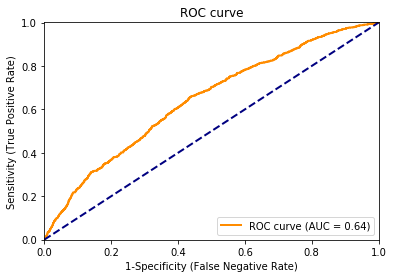

 AUC: 0.6432656118015295


In [30]:
# MODEL METRICS 
print('Metrics of the logistic regression model: \n')
cm = np.transpose(confusion_matrix(Y_test, Y_pred))
print("Confusion matrix: \n" + str(cm))
print("Accuracy: " + str(custom_accuracy_score(Y_test, Y_pred))) 
print("SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(Y_test, Y_pred)))
print("SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(Y_test, Y_pred)))
print("POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(Y_test, Y_pred)))
print("NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(Y_test, Y_pred)))
plot_roc(Y_test, Y_pred_prob)
print(" AUC: " + str(roc_auc_score(Y_test, Y_pred_prob)))

In [31]:
#APPLY VARIABLE SELECTION WITH STEPWISE RECURSIVE FEATURE SELECTION
from sklearn.feature_selection import RFE

In [35]:
#GENERATE AUC USING DIFFERENT VALUES FOR THE NUMBER OF FEATURES TO BE SELECTED
for i in range(2, 21):
    locals()["rfe"+str(i)] = RFE(estimator=classifier_LR, n_features_to_select=i, step=1)
    locals()["rfe"+str(i)].fit(X_train, Y_train)
    locals()["ranking"+str(i)] = locals()["rfe"+str(i)].ranking_.reshape(len(X_train.columns))
    #pd.DataFrame([X_test.columns,locals()["ranking"+str(i)]]).transpose().sort_values(1).head(20)

In [36]:
AUC_logit = {}
for i in range(2,21):
    locals()["classifier_LR_RFE"+str(i)] = locals()["rfe"+str(i)].fit(X_train, Y_train)
    locals()["Y_pred_prob"+str(i)] = locals()["classifier_LR_RFE"+str(i)].predict_proba(X_test)[:,1]
    locals()["Y_pred"+str(i)] = np.where(locals()["Y_pred_prob"+str(i)] > class_threshold, 1, 0)
    AUC_logit[i] = roc_auc_score(Y_test, locals()["Y_pred_prob"+str(i)])

In [37]:
#PRINT THE RESULTING AUC FOR NUMBER OF FEATURES FROM 2-20
AUC_logit

{2: 0.6770415966004206,
 3: 0.7393148712188489,
 4: 0.7426668337081263,
 5: 0.7515365839702208,
 6: 0.7529333295354088,
 7: 0.7543928416852802,
 8: 0.7535539372924007,
 9: 0.7538215145198772,
 10: 0.7538050036311352,
 11: 0.7538193718854603,
 12: 0.7538965067244691,
 13: 0.753266068056623,
 14: 0.7528814021601284,
 15: 0.7527795640066659,
 16: 0.7527709934689981,
 17: 0.7524154421931099,
 18: 0.7515367100075395,
 19: 0.7527247377730567,
 20: 0.7525651745276563}

In [38]:
#FIRST 5 PREDICTED AND ACTUAL VALUES
i = 7
print(locals()["Y_pred_prob"+str(i)][0:5]) # first 5 probabilities 
print(locals()["Y_pred"+str(i)][0:5]) # resultant predicted classification 
print(list(Y_test[0:5])) # actual outcomes

[0.41189619 0.12071663 0.14698281 0.10887551 0.14518317]
[1 0 0 0 0]
[0, 1, 0, 1, 0]


In [39]:
#RUN THE LOGISTIC REGRESSION AFTER STEPWISE RECURSIVE FEATURE SELECTION WITH 7 FEATURES
i = 7
classifier_LR_RFE = locals()["classifier_LR_RFE"+str(i)]
Y_pred_prob = locals()["Y_pred_prob"+str(i)] # probabilities
Y_pred = locals()["Y_pred"+str(i)] # classification

Metrics of the logistic regression model after variable selection: 

Confusion matrix: 
[[3130  455]
 [ 609  606]]
Accuracy: 0.7783333333333333
SENSITIVITY (aka RECALL): 0.5711592836946278
SPECIFICITY (aka FALL-OUT): 0.8371222251939021
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.49876543209876545
NEGATIVE PREDICTIVE VALUE): 0.8730822873082287


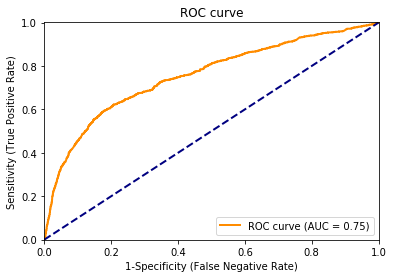

 AUC: 0.7543928416852802


In [40]:
# MODEL METRICS AFTER VARIABLE SELECTION 
print('Metrics of the logistic regression model after variable selection: \n')
cm = np.transpose(confusion_matrix(Y_test, Y_pred))
print("Confusion matrix: \n" + str(cm))
print("Accuracy: " + str(custom_accuracy_score(Y_test, Y_pred))) 
print("SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(Y_test, Y_pred)))
print("SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(Y_test, Y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(Y_test, Y_pred)))
print("NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(Y_test, Y_pred)))
plot_roc(Y_test, Y_pred_prob)
print(" AUC: " + str(roc_auc_score(Y_test, Y_pred_prob)))

# CART

In [41]:
#SETTING RANGE FOR MAXIMUM NUMBER OF NODES TO BE TRIED TO MAXIMIZE AUC
max_nodes = range(2,41)
for i in max_nodes:
    locals()["classifier_DT_"+str(i)] = DecisionTreeClassifier(max_leaf_nodes = i, random_state = seed)
    locals()["classifier_DT_"+str(i)].fit(X_train, Y_train)
    locals()["Y_pred_prob_DT_"+str(i)] = locals()["classifier_DT_"+str(i)].predict_proba(X_test)[:,1] # probabilities
class_threshold = 5306/24000
for i in max_nodes:
    locals()["Y_pred_DT_"+str(i)] = np.where(locals()["Y_pred_prob_DT_"+str(i)] > class_threshold, 1, 0) # classification

In [42]:
#FIRST 5 PREDICTED AND ACTUAL VALUES
i = 18
print(locals()["Y_pred_prob_DT_"+str(i)][0:5]) # first 5 probabilities 
print(locals()["Y_pred_DT_"+str(i)][0:5]) # resultant predicted classification 
print(list(Y_test[0:5])) # actual outcomes

[0.50381679 0.29032258 0.15198864 0.13509317 0.29032258]
[1 1 0 0 1]
[0, 1, 0, 1, 0]


CART tree with 18 leafs


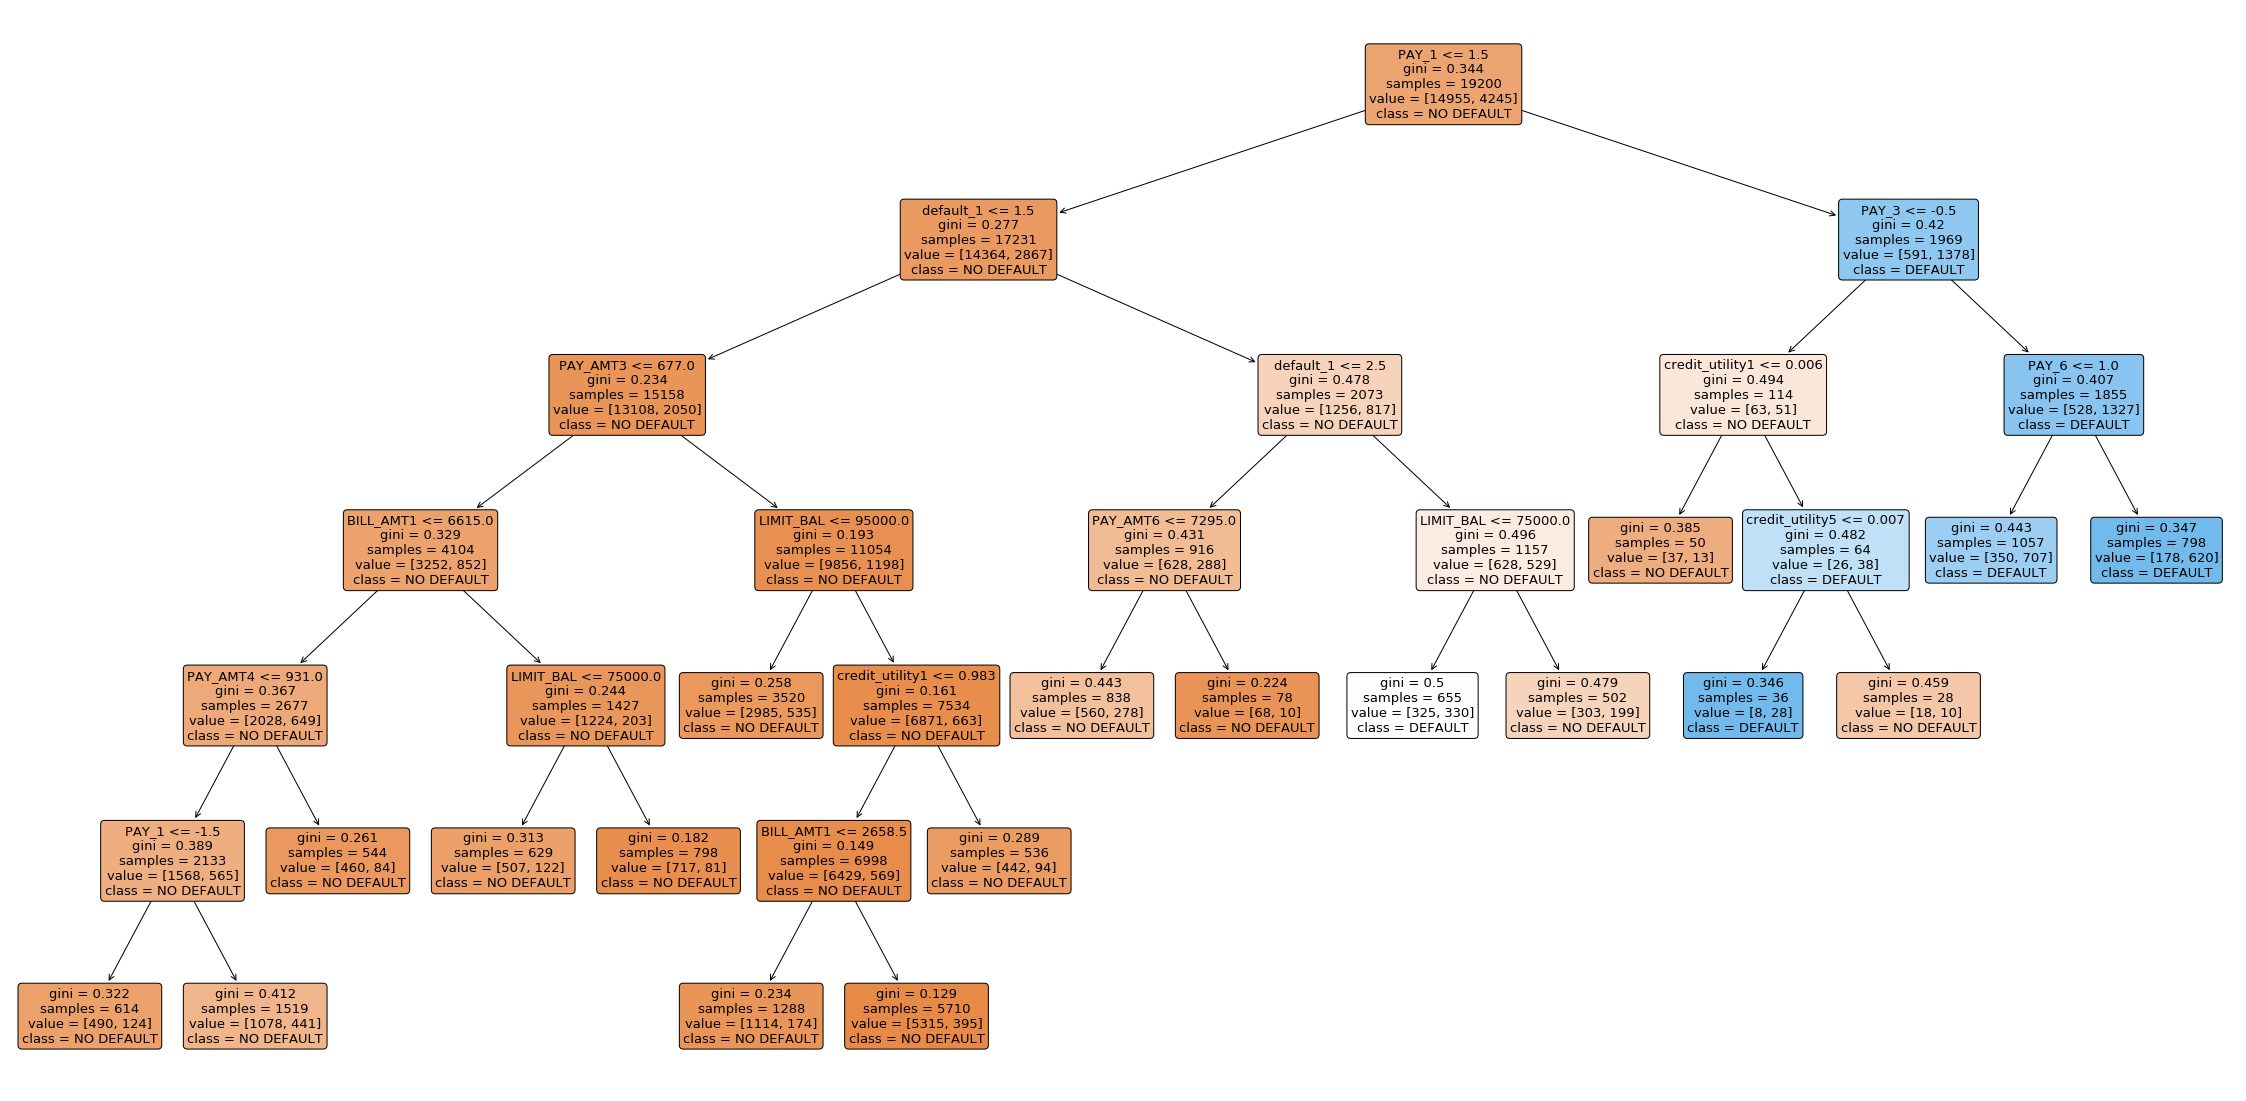

In [45]:
# VISUALIZING THE RESULTANT TREE
i = 18
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(locals()["classifier_DT_"+str(i)].fit(X_train, Y_train), feature_names = X_train.columns, filled = True, 
               class_names = ['NO DEFAULT', 'DEFAULT'], rounded = True)
print('CART tree with {} leafs'.format(i))

Metrics of the CART model: 

Confusion matrix: 
[[3016  418]
 [ 723  643]]
Accuracy: 0.7622916666666667
SENSITIVITY (aka RECALL): 0.6060320452403393
SPECIFICITY (aka FALL-OUT): 0.8066327895159133
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4707174231332357
NEGATIVE PREDICTIVE VALUE): 0.8782760629004077


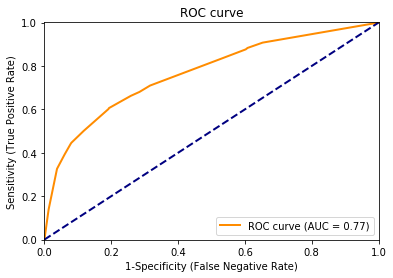

 AUC: 0.7666383754898756


In [49]:
#MODEL METRICS
i = 18
print('Metrics of the CART model: \n')
cm = np.transpose(confusion_matrix(Y_test, locals()["Y_pred_DT_"+str(i)]))
print("Confusion matrix: \n" + str(cm))
print("Accuracy: " + str(custom_accuracy_score(Y_test, locals()["Y_pred_DT_"+str(i)]))) 
print("SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(Y_test, locals()["Y_pred_DT_"+str(i)])))
print("SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(Y_test, locals()["Y_pred_DT_"+str(i)])))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(Y_test, locals()["Y_pred_DT_"+str(i)])))
print("NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(Y_test, locals()["Y_pred_DT_"+str(i)])))
plot_roc(Y_test, locals()["Y_pred_prob_DT_"+str(i)])
print(" AUC: " + str(roc_auc_score(Y_test, locals()["Y_pred_prob_DT_"+str(i)])))

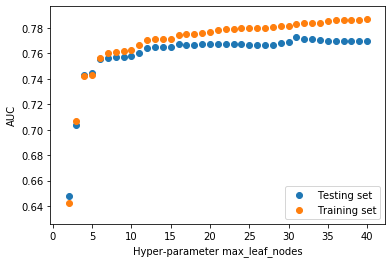

In [50]:
# TEST DATA AUC PLOT
AUC_DT = []
for i in max_nodes:
    AUC_DT.append([i,roc_auc_score(Y_test, locals()["Y_pred_prob_DT_"+str(i)])])

AUC_DT = pd.DataFrame(AUC_DT, columns = ["max_nodes", "AUC"])
plt.scatter(AUC_DT["max_nodes"],AUC_DT["AUC"])

# NOW FOR EACH MODEL CALCULATE AUC ON TRAINING 
AUC_DT0 = []
for i in max_nodes:

    locals()["classifier_DT0_"+str(i)] = tree.DecisionTreeClassifier(max_leaf_nodes = i, random_state = seed)
    locals()["classifier_DT0_"+str(i)] = locals()["classifier_DT0_"+str(i)].fit(X_train, Y_train)
    locals()["Y_pred_prob_DT0_"+str(i)] = locals()["classifier_DT0_"+str(i)].predict_proba(X_train)[:,1] 
    locals()["Y_pred_DT0_"+str(i)] = np.where(locals()["Y_pred_prob_DT0_"+str(i)] > class_threshold, 1, 0)

    AUC_DT0.append([i,roc_auc_score(Y_train, locals()["Y_pred_prob_DT0_"+str(i)])])

# PLOT THE TRAINING SET AUCS
AUC_DT0 = pd.DataFrame(AUC_DT0, columns = ["max_nodes", "AUC"])
plt.scatter(AUC_DT0["max_nodes"],AUC_DT0["AUC"])
plt.xlabel('Hyper-parameter max_leaf_nodes')
plt.ylabel('AUC') # LABEL THE AXES ON THE PLOT
plt.legend(['Testing set','Training set']) # ADD THE LEGEND

In [51]:
#PRINT MAX_NODES VS AUC
AUC_DT

,max_nodes,AUC
0,2,0.647580
1,3,0.704062
2,4,0.743413
3,5,0.744585
4,6,0.755758
5,7,0.756657
6,8,0.756952
7,9,0.757484
8,10,0.757956
9,11,0.760467


# RANDOM FOREST

In [70]:
# DEFINE A RANDOM FOREST MODEL AND CALL IT CLASSIFIER_RF
classifier_RF = RandomForestClassifier(random_state = seed) # recall what random_state mean

In [71]:
# TRAIN THE MODEL CLASSIFIER_RF ON THE TRAINING DATA
classifier_RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=69122,
                       verbose=0, warm_start=False)

In [72]:
class_threshold = 0.25 #Adjusted from 5306/24000 to 0.25 to get highest profit
# USE THE TRAINED MODEL TO PREDICT TESTING DATA
y_pred_prob_RF = classifier_RF.predict_proba(X_test)[:,1] # probabilities 
y_pred_RF = np.where(y_pred_prob_RF > class_threshold, 1, 0) # classification

Metrics of the Random Forest model: 

Confusion matrix: 
[[2889  393]
 [ 850  668]]
                                   Accuracy: 0.7410416666666667
                   SENSITIVITY (aka RECALL): 0.6295947219604147
                 SPECIFICITY (aka FALL-OUT): 0.7726664883658733
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4400527009222661
                 NEGATIVE PREDICTIVE VALUE): 0.8802559414990859


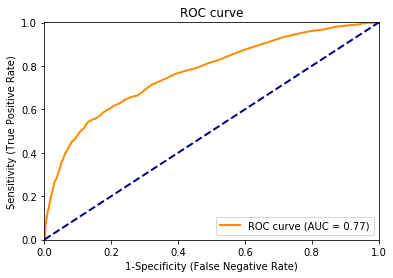

 AUC: 0.7703854649730948


In [73]:
#MODEL METRICS
print('Metrics of the Random Forest model: \n')
cm = np.transpose(confusion_matrix(Y_test, y_pred_RF))
print("Confusion matrix: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(Y_test, y_pred_RF))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(Y_test, y_pred_RF)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(Y_test, y_pred_RF)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(Y_test, y_pred_RF)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(Y_test, y_pred_RF)))
plot_roc(Y_test, y_pred_prob_RF)
print(" AUC: " + str(roc_auc_score(Y_test, y_pred_prob_RF)))

In [74]:
# HYPER-PARAMETER TUNING ("OPTIMIZATION") USING THE FUNCTION GRIDSEARCHCV FOR MAXIMIZING AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# HYPERPARAMETERS
n_trees = [100, 200, 300, 400, 500, 600]
n_leaf_nodes = [5, 15, 25, 40]
#max_features = 

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'max_leaf_nodes':n_leaf_nodes}] ] 

# WE WILL APPLY A 5-FOLD CROSS-VALIDATION AND CALL THE RESULTANT FUNCTION "GRID_SEARCH"
grid_search = GridSearchCV(estimator = classifier_RF, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# APPLY FUNCTION GRID_SEARCH TO THE TRAINING DATA, CALL THE RESULTAND BEST MODEL GRID_SEARCH_RF
grid_search_RF = grid_search.fit(X_train, Y_train)

Optimized hyper-parameters:{'max_leaf_nodes': 40, 'n_estimators': 200}
Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": 

Confusion matrix: 
[[3166  436]
 [ 573  625]]
                                   Accuracy: 0.7897916666666667
                   SENSITIVITY (aka RECALL): 0.589066918001885
                 SPECIFICITY (aka FALL-OUT): 0.8467504680395828
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.5217028380634391
                 NEGATIVE PREDICTIVE VALUE): 0.8789561354802887


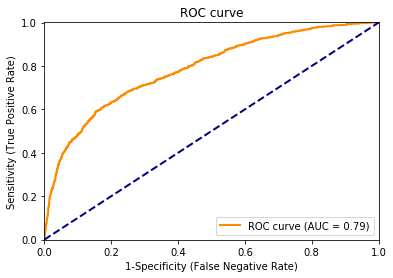

 AUC: 0.7867263293723165


In [75]:
# USE THE BEST MODEL TO PREDICT THE TESTING DATA
y_pred_prob_RF = grid_search_RF.predict_proba(X_test)[:,1] # probabilities  
y_pred_RF = np.where(y_pred_prob_RF > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

#MODEL METRICS
print('Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": \n')
cm = np.transpose(confusion_matrix(Y_test, y_pred_RF))
print("Confusion matrix: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(Y_test, y_pred_RF))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(Y_test, y_pred_RF)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(Y_test, y_pred_RF)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(Y_test, y_pred_RF)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(Y_test, y_pred_RF)))
plot_roc(Y_test, y_pred_prob_RF)
print(" AUC: " + str(roc_auc_score(Y_test, y_pred_prob_RF)))

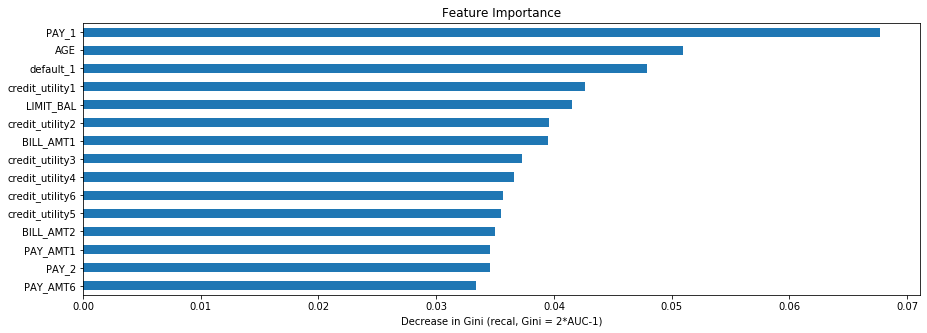

In [76]:
# CALCULATE FEATURE IMPORTANCES
importances = grid_search_RF.best_estimator_.feature_importances_ 

# PLOT THEM
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

In [77]:
#WRITE RESULTS
y_pred_prob_RF_export = pd.DataFrame(np.array(Y_test), columns = ["y_test"], index = Y_test.index)
y_pred_prob_RF_export["ytest_Pred_Prob_RF"] = y_pred_prob_RF

In [78]:
#THRESHOLD CALULATION
for threshold in np.arange(0,1.01,0.01):
    y_pred_prob_RF_export["ytest_pred{}".format(threshold)] = np.where(y_pred_prob_RF > threshold, 1, 0)
    
for threshold in np.arange(0,1.01,0.01):
    y_pred_prob_RF_export["profit{}".format(threshold)] = 0
    for j in y_pred_prob_RF_export.index:
        if y_pred_prob_RF_export["ytest_pred{}".format(threshold)][j] == 1:
            y_pred_prob_RF_export["profit{}".format(threshold)][j] = 0
        elif y_pred_prob_RF_export["y_test"][j] == 1:
                y_pred_prob_RF_export["profit{}".format(threshold)][j] = -5000
        else:
            y_pred_prob_RF_export["profit{}".format(threshold)][j] = 1500

In [79]:
profit_RF = pd.DataFrame({"profit":0}, index = np.arange(0,1.01,0.01))
for threshold in np.arange(0,1.01,0.01):
    profit_RF["profit"][threshold] = sum(y_pred_prob_RF_export["profit{}".format(threshold)])

In [80]:
profit_RF[0.15:0.3]

,profit
0.15,2155500
0.16,2270500
0.17,2307500
0.18,2406000
0.19,2475500
0.20,2508000
0.21,2523000
0.22,2534000
0.23,2548000
0.24,2543000


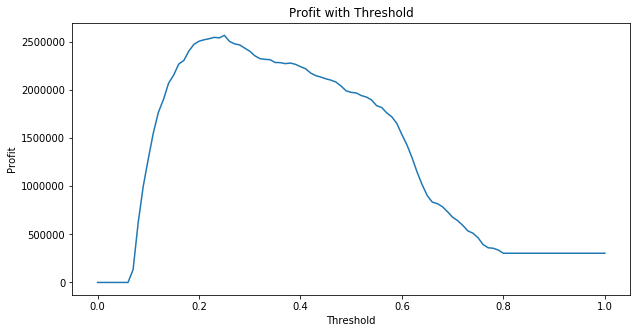

In [81]:
#PLOT PROFITS AGAINST THRESHOLD
plt.figure(figsize=(10,5))
plt.title('Profit with Threshold')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.plot(profit_RF)

# GRADIENT BOOSTING

In [82]:
classifier_GBM = GradientBoostingClassifier(random_state = seed)

# TRAIN THE MODEL CLASSIFIER_GBM ON THE TRAINING DATA
classifier_GBM.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=69122, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
# USE THE TRAINED MODEL TO PREDICT TESTING DATA
y_pred_prob_GBM = classifier_GBM.predict_proba(X_test)[:,1] # probabilities 
y_pred_GBM = np.where(y_pred_prob_GBM > class_threshold, 1, 0) # classification

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[3113  427]
 [ 626  634]]
Accuracy: 0.780625
SENSITIVITY (aka RECALL): 0.5975494816211122
SPECIFICITY (aka FALL-OUT): 0.8325755549612196
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.5031746031746032
NEGATIVE PREDICTIVE VALUE): 0.8793785310734463


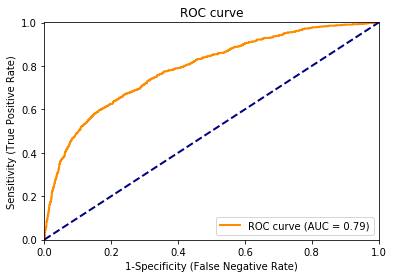

 AUC: 0.7883945593218588


In [84]:
#MODEL METRICS
print('Metrics of the Gradient Boosting Machine model: \n')
cm = np.transpose(confusion_matrix(Y_test, y_pred_GBM))
print("Confusion matrix: \n" + str(cm))
print("Accuracy: " + str(custom_accuracy_score(Y_test, y_pred_GBM))) 
print("SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(Y_test, y_pred_GBM)))
print("SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(Y_test, y_pred_GBM)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(Y_test, y_pred_GBM)))
print("NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(Y_test, y_pred_GBM)))
plot_roc(Y_test, y_pred_prob_GBM)
print(" AUC: " + str(roc_auc_score(Y_test, y_pred_prob_GBM)))

In [68]:
# HYPER-PARAMETER TUNING ("OPTIMIZATION") USING THE FUNCTION GRIDSEARCHCV FOR MAXIMIZING AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# TUNING PARAMETERS
n_trees = [100, 200, 300, 400, 500, 600] # first, the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
learning_rates = [0.01, 0.1] # second, speed of boosting ("learning rate") and we will use two values 0.01 и 0.1
leaf_nodes = n_leaf_nodes = [5, 15, 25, 40]

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'learning_rate': learning_rates, 'max_leaf_nodes': leaf_nodes}] ] 

# WE WILL APPLY A 5-FOLD CROSS-VALIDATION AND CALL THE RESULTANT FUNCTION "GRID_SEARCH"
grid_search2 = GridSearchCV(estimator = classifier_GBM, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# APPLY FUNCTION GRID_SEARCH TO THE TRAINING DATA, CALL THE RESULTANT BEST MODEL GRID_SEARCH_GBM
grid_search_GBM = grid_search2.fit(X_train, Y_train)

Optimized hyper-parameters:{'max_leaf_nodes': 40, 'n_estimators': 200}
Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": 

Confusion matrix: 
[[2909  383]
 [ 830  678]]
                                   Accuracy: 0.7472916666666667
                   SENSITIVITY (aka RECALL): 0.6390197926484449
                 SPECIFICITY (aka FALL-OUT): 0.7780155121690292
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4496021220159151
                 NEGATIVE PREDICTIVE VALUE): 0.8836573511543135


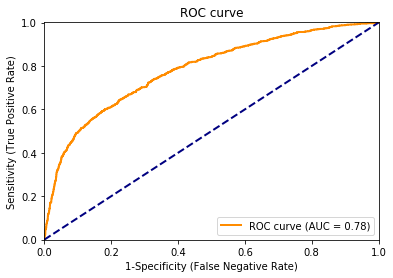

 AUC: 0.7818772956122123


In [69]:
# USE THE BEST MODEL TO PREDICT THE TESTING DATA 
y_pred_prob_GBM2 = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred_GBM2 = np.where(y_pred_prob_GBM2 > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

#MODEL METRICS
print('Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": \n')
cm = np.transpose(confusion_matrix(Y_test, y_pred_GBM2))
print("Confusion matrix: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(Y_test, y_pred_GBM2))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(Y_test, y_pred_GBM2)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(Y_test, y_pred_GBM2)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(Y_test, y_pred_GBM2)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(Y_test, y_pred_GBM2)))
plot_roc(Y_test, y_pred_prob_GBM2)
print(" AUC: " + str(roc_auc_score(Y_test, y_pred_prob_GBM2)))